In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

In D:\ProgramFiles\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\ProgramFiles\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\ProgramFiles\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In D:\ProgramFiles\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\ProgramFiles\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rcparam was 

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
#### DF CONTROL ##### 

In [5]:
df_test = pd.read_csv('test_group.csv', sep=";")
df_test.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [6]:
df_test.rename(columns = {'Spend [USD]':'Spend_USD', '# of Impressions':'Number of Impressions',
                        '# of Website Clicks':  'Number of Website Clicks',
                        '# of Searches':'Number of Searches', '# of View Content':'Number of View Content',
                        '# of Add to Cart':'Number of Add to Cart', '# of Purchase':'Number of Purchase' }, 
              inplace = True)
df_test.head()

,Campaign Name,Date,Spend_USD,Number of Impressions,Reach,Number of Website Clicks,Number of Searches,Number of View Content,Number of Add to Cart,Number of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Campaign Name             30 non-null     object
 1   Date                      30 non-null     object
 2   Spend_USD                 30 non-null     int64 
 3   Number of Impressions     30 non-null     int64 
 4   Reach                     30 non-null     int64 
 5   Number of Website Clicks  30 non-null     int64 
 6   Number of Searches        30 non-null     int64 
 7   Number of View Content    30 non-null     int64 
 8   Number of Add to Cart     30 non-null     int64 
 9   Number of Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


In [8]:
#change date datatypes
df_test['Date'] = pd.to_datetime(df_test['Date'], format='%d.%m.%Y')
df_test.iloc[:,2:10] = df_test.iloc[:,2:10].apply(pd.to_numeric)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Campaign Name             30 non-null     object        
 1   Date                      30 non-null     datetime64[ns]
 2   Spend_USD                 30 non-null     int64         
 3   Number of Impressions     30 non-null     int64         
 4   Reach                     30 non-null     int64         
 5   Number of Website Clicks  30 non-null     int64         
 6   Number of Searches        30 non-null     int64         
 7   Number of View Content    30 non-null     int64         
 8   Number of Add to Cart     30 non-null     int64         
 9   Number of Purchase        30 non-null     int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 2.5+ KB


In [9]:
df_test.describe()

,Spend_USD,Number of Impressions,Reach,Number of Website Clicks,Number of Searches,Number of View Content,Number of Add to Cart,Number of Purchase
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2563.066667,74584.800000,53491.566667,6032.333333,2418.966667,1858.000000,881.533333,521.233333
std,348.687681,32121.377422,28795.775752,1708.567263,388.742312,597.654669,347.584248,211.047745
min,1968.000000,22521.000000,10598.000000,3038.000000,1854.000000,858.000000,278.000000,238.000000
25%,2324.500000,47541.250000,31516.250000,4407.000000,2043.000000,1320.000000,582.500000,298.000000
50%,2584.000000,68853.500000,44219.500000,6242.500000,2395.500000,1881.000000,974.000000,500.000000
75%,2836.250000,99500.000000,78778.750000,7604.750000,2801.250000,2412.000000,1148.500000,701.000000
max,3112.000000,133771.000000,109834.000000,8264.000000,2978.000000,2801.000000,1391.000000,890.000000


In [ ]:
##### DF CONTROL ##### 

In [35]:
df_control = pd.read_csv('control_group.csv', sep=";")
df_control.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df_control.rename(columns = {'Spend [USD]':'Spend_USD', '# of Impressions':'Number of Impressions',
                        '# of Website Clicks':  'Number of Website Clicks',
                        '# of Searches':'Number of Searches', '# of View Content':'Number of View Content',
                        '# of Add to Cart':'Number of Add to Cart', '# of Purchase':'Number of Purchase' }, 
              inplace = True)
df_control.head()

,Campaign Name,Date,Spend_USD,Number of Impressions,Reach,Number of Website Clicks,Number of Searches,Number of View Content,Number of Add to Cart,Number of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Campaign Name             30 non-null     object 
 1   Date                      30 non-null     object 
 2   Spend_USD                 30 non-null     int64  
 3   Number of Impressions     29 non-null     float64
 4   Reach                     29 non-null     float64
 5   Number of Website Clicks  29 non-null     float64
 6   Number of Searches        29 non-null     float64
 7   Number of View Content    29 non-null     float64
 8   Number of Add to Cart     29 non-null     float64
 9   Number of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [38]:
df_control['Date'] = pd.to_datetime(df_control['Date'], format='%d.%m.%Y')
df_control.iloc[:,2:10] = df_control.iloc[:,2:10].apply(pd.to_numeric)
df_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Campaign Name             30 non-null     object        
 1   Date                      30 non-null     datetime64[ns]
 2   Spend_USD                 30 non-null     int64         
 3   Number of Impressions     29 non-null     float64       
 4   Reach                     29 non-null     float64       
 5   Number of Website Clicks  29 non-null     float64       
 6   Number of Searches        29 non-null     float64       
 7   Number of View Content    29 non-null     float64       
 8   Number of Add to Cart     29 non-null     float64       
 9   Number of Purchase        29 non-null     float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 2.5+ KB


In [39]:
#There is a row with missing values. Let's fill the missing values with K-Nearest Neighbor.
imputer = KNNImputer(weights='distance')
df_control.iloc[:,2:10]=pd.DataFrame(imputer.fit_transform(df_control.iloc[:,2:10]))

### Burada mean ile veri doldurmaktansa KNN ile veri doldurulmuş. Bu kısım biraz detaylı olarak bahsedelim. 

In [ ]:
df_control.head()

In [19]:
df_control.describe()

,Spend_USD,Number of Impressions,Reach,Number of Website Clicks,Number of Searches,Number of View Content,Number of Add to Cart,Number of Purchase
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2563.066667,74584.800000,53491.566667,6032.333333,2418.966667,1858.000000,881.533333,521.233333
std,348.687681,32121.377422,28795.775752,1708.567263,388.742312,597.654669,347.584248,211.047745
min,1968.000000,22521.000000,10598.000000,3038.000000,1854.000000,858.000000,278.000000,238.000000
25%,2324.500000,47541.250000,31516.250000,4407.000000,2043.000000,1320.000000,582.500000,298.000000
50%,2584.000000,68853.500000,44219.500000,6242.500000,2395.500000,1881.000000,974.000000,500.000000
75%,2836.250000,99500.000000,78778.750000,7604.750000,2801.250000,2412.000000,1148.500000,701.000000
max,3112.000000,133771.000000,109834.000000,8264.000000,2978.000000,2801.000000,1391.000000,890.000000


In [40]:
df_control.head()

,Campaign Name,Date,Spend_USD,Number of Impressions,Reach,Number of Website Clicks,Number of Searches,Number of View Content,Number of Add to Cart,Number of Purchase
0,Control Campaign,2019-08-01,2280.0,82702.000000,56930.000000,7016.000000,2290.000000,2159.000000,1819.00000,618.000000
1,Control Campaign,2019-08-02,1757.0,121040.000000,102513.000000,8110.000000,2033.000000,1841.000000,1219.00000,511.000000
2,Control Campaign,2019-08-03,2343.0,131711.000000,110862.000000,6508.000000,1737.000000,1549.000000,1134.00000,372.000000
3,Control Campaign,2019-08-04,1940.0,72878.000000,61235.000000,3065.000000,1042.000000,982.000000,1183.00000,340.000000
4,Control Campaign,2019-08-05,1835.0,99328.079583,80183.346166,5733.358353,2147.197568,1943.443727,1363.53056,598.735991


In [41]:
#Combine two datasets into one and add new features for metrics evaluation
df = pd.concat([df_test,df_control])
df = df.reset_index()
df['USD Spend per Purchase'] = round(df['Spend_USD']/df['Number of Purchase'],2)
df['CTR(%)'] = round(df['Number of Website Clicks']*100/df['Number of Impressions'],2)
df['Conversion Rate(%)'] = round(df['Number of Purchase']*100/df['Number of Website Clicks'],2)

### Başka bir feature ne üretilebilir? 

In [42]:
df["Campaign Name"].unique()

array(['Test Campaign', 'Control Campaign'], dtype=object)

In [22]:
df.describe()

,index,Spend_USD,Number of Impressions,Reach,Number of Website Clicks,Number of Searches,Number of View Content,Number of Add to Cart,Number of Purchase,USD Spend per Purchase,CTR(%),Conversion Rate(%)
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,14.500000,2563.066667,74584.800000,53491.566667,6032.333333,2418.966667,1858.000000,881.533333,521.233333,5.900000,10.241667,9.230667
std,8.728484,345.720072,31847.999025,28550.700863,1694.026001,385.433807,592.568154,344.626030,209.251561,2.776893,6.713980,4.411400
min,0.000000,1968.000000,22521.000000,10598.000000,3038.000000,1854.000000,858.000000,278.000000,238.000000,2.430000,2.980000,3.010000
25%,7.000000,2311.000000,45511.000000,31489.000000,4399.000000,2037.000000,1281.000000,566.000000,284.000000,3.720000,5.290000,6.520000
50%,14.500000,2584.000000,68853.500000,44219.500000,6242.500000,2395.500000,1881.000000,974.000000,500.000000,5.065000,8.035000,8.450000
75%,22.000000,2838.000000,100719.000000,79632.000000,7617.000000,2824.000000,2427.000000,1168.000000,709.000000,7.720000,12.880000,11.980000
max,29.000000,3112.000000,133771.000000,109834.000000,8264.000000,2978.000000,2801.000000,1391.000000,890.000000,12.700000,33.820000,21.090000


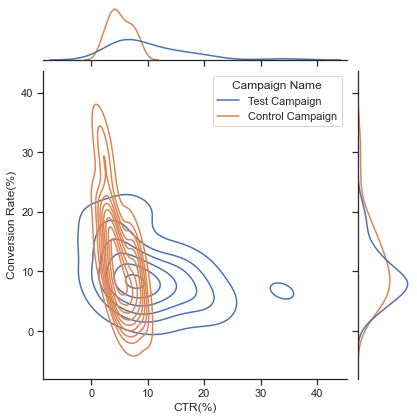

In [43]:
sns.set_theme(style="ticks")
g = sns.jointplot(
    data=df,
    x="CTR(%)", y="Conversion Rate(%)", hue="Campaign Name",
    kind="kde",
)
plt.show()

### Şuradaki kısım scatter grafiği şeklinde olacak.

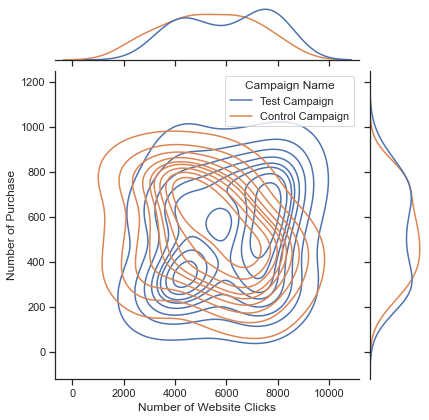

In [44]:
sns.set_theme(style="ticks")
g = sns.jointplot(
    data=df,
    x="Number of Website Clicks", y="Number of Purchase", hue="Campaign Name",
    kind="kde",
)
plt.show()

### Burada çizgi grafiği olacak

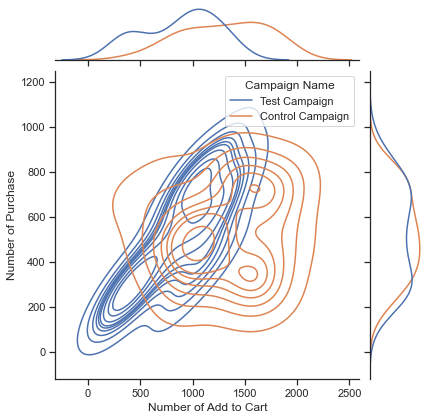

In [45]:
sns.set_theme(style="ticks")
g = sns.jointplot(
    data=df,
    x="Number of Add to Cart", y="Number of Purchase", hue="Campaign Name",
    kind="kde",
)
plt.show()

# Add to to cart ile ilgili feature üretilebilir mi? Purchase / Cart 

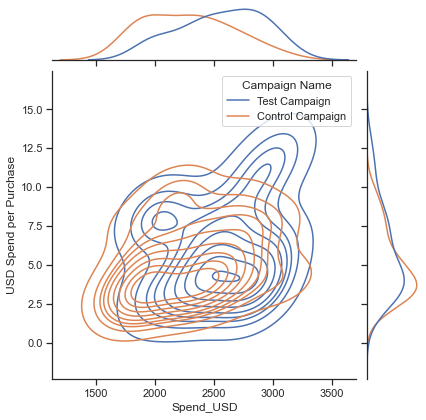

In [46]:
sns.set_theme(style="ticks")
g = sns.jointplot(
    data=df,
    x="Spend_USD", y="USD Spend per Purchase", hue="Campaign Name",
    kind="kde",
)
plt.show()

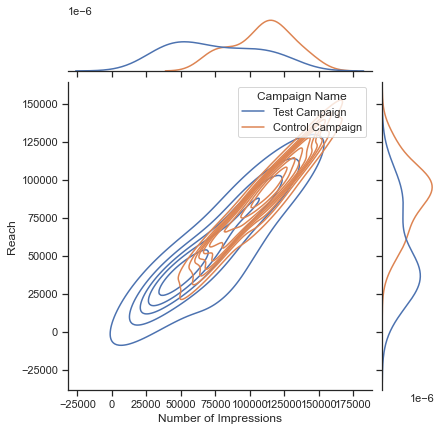

In [47]:
sns.set_theme(style="ticks")
g = sns.jointplot(
    data=df,
    x="Number of Impressions", y="Reach", hue="Campaign Name",
    kind="kde",
)
plt.show()

In [48]:
total_spend = df.groupby(['Campaign Name'])['Spend_USD'].sum().reset_index()
total_spend

,Campaign Name,Spend_USD
0,Control Campaign,68653.0
1,Test Campaign,76892.0
